In [1]:
import nltk
import string
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install nlp-utils

In [3]:
import nlp_utils

In [4]:
nltk.download('vader_lexicon')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\noota\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\noota\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\noota\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\noota\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
f = open("dialogs.txt", "r")
print(f.read())

hi, how are you doing?	i'm fine. how about yourself?
i'm fine. how about yourself?	i'm pretty good. thanks for asking.
i'm pretty good. thanks for asking.	no problem. so how have you been?
no problem. so how have you been?	i've been great. what about you?
i've been great. what about you?	i've been good. i'm in school right now.
i've been good. i'm in school right now.	what school do you go to?
what school do you go to?	i go to pcc.
i go to pcc.	do you like it there?
do you like it there?	it's okay. it's a really big campus.
it's okay. it's a really big campus.	good luck with school.
good luck with school.	thank you very much.
how's it going?	i'm doing well. how about you?
i'm doing well. how about you?	never better, thanks.
never better, thanks.	so how have you been lately?
so how have you been lately?	i've actually been pretty good. you?
i've actually been pretty good. you?	i'm actually in school right now.
i'm actually in school right now.	which school do you attend?
which school do 

In [6]:
df = pd.read_csv('dialogs.txt', names=('Query', 'Response'), sep=('\t'))

In [7]:
df

,Query,Response
0,"hi, how are you doing?",i'm fine. how about yourself?
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,no problem. so how have you been?,i've been great. what about you?
4,i've been great. what about you?,i've been good. i'm in school right now.
...,...,...
3720,that's a good question. maybe it's not old age.,are you right-handed?
3721,are you right-handed?,yes. all my life.
3722,yes. all my life.,you're wearing out your right hand. stop using...
3723,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.


DATA UNDERSTANDING

In [8]:
df.shape

(3725, 2)

In [9]:
df.columns

Index(['Query', 'Response'], dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3725 entries, 0 to 3724
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Query     3725 non-null   object
 1   Response  3725 non-null   object
dtypes: object(2)
memory usage: 58.3+ KB


In [11]:
df.describe()

,Query,Response
count,3725,3725
unique,3510,3512
top,what do you mean?,what do you mean?
freq,22,22


In [12]:
df.nunique()

Query       3510
Response    3512
dtype: int64

In [13]:
df.isnull().sum()

Query       0
Response    0
dtype: int64

In [14]:
df['Query'].value_counts()

what do you mean?                              22
why not?                                       16
what happened?                                 10
why is that?                                    9
me too.                                         7
                                               ..
you can yell at them.                           1
and they will yell back at you.                 1
yelling doesn't do any good.                    1
will you look at this form?                     1
but i do all my writing with my right hand.     1
Name: Query, Length: 3510, dtype: int64

In [15]:
df['Response'].value_counts()

what do you mean?                                                       22
why not?                                                                16
what happened?                                                          10
why is that?                                                             9
of course.                                                               8
                                                                        ..
i don't understand some things.                                          1
let me help you.                                                         1
what does "mi" mean?                                                     1
mi stands for middle initial.                                            1
start typing instead. that way your left hand will do half the work.     1
Name: Response, Length: 3512, dtype: int64

DATA VISUALIZATION

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [17]:
text = df['Query']

In [18]:
sid = SentimentIntensityAnalyzer()
for sentence in text:
    print(sentence)
    
    ss = sid.polarity_scores(sentence)
    for k in ss:
        print('{0}: {1}, ' .format(k, ss[k]), end='')
    print()

hi, how are you doing?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm fine. how about yourself?
neg: 0.0, neu: 0.69, pos: 0.31, compound: 0.2023, 
i'm pretty good. thanks for asking.
neg: 0.0, neu: 0.25, pos: 0.75, compound: 0.8402, 
no problem. so how have you been?
neg: 0.495, neu: 0.505, pos: 0.0, compound: -0.5994, 
i've been great. what about you?
neg: 0.0, neu: 0.549, pos: 0.451, compound: 0.6249, 
i've been good. i'm in school right now.
neg: 0.0, neu: 0.707, pos: 0.293, compound: 0.4404, 
what school do you go to?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i go to pcc.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
do you like it there?
neg: 0.0, neu: 0.615, pos: 0.385, compound: 0.3612, 
it's okay. it's a really big campus.
neg: 0.0, neu: 0.725, pos: 0.275, compound: 0.2263, 
good luck with school.
neg: 0.0, neu: 0.253, pos: 0.747, compound: 0.7096, 
how's it going?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm doing well. how about you?
neg: 0.0, neu: 0.704, pos: 0.2

In [19]:
analyzer = SentimentIntensityAnalyzer()
df['rating'] = text.apply(analyzer.polarity_scores)
df = pd.concat([df.drop(['rating'], axis=1), df['rating'].apply(pd.Series)], axis=1)

In [20]:
df

,Query,Response,neg,neu,pos,compound
0,"hi, how are you doing?",i'm fine. how about yourself?,0.000,1.000,0.000,0.0000
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,0.000,0.690,0.310,0.2023
2,i'm pretty good. thanks for asking.,no problem. so how have you been?,0.000,0.250,0.750,0.8402
3,no problem. so how have you been?,i've been great. what about you?,0.495,0.505,0.000,-0.5994
4,i've been great. what about you?,i've been good. i'm in school right now.,0.000,0.549,0.451,0.6249
...,...,...,...,...,...,...
3720,that's a good question. maybe it's not old age.,are you right-handed?,0.000,0.707,0.293,0.4404
3721,are you right-handed?,yes. all my life.,0.000,1.000,0.000,0.0000
3722,yes. all my life.,you're wearing out your right hand. stop using...,0.000,0.526,0.474,0.4019
3723,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.,0.153,0.625,0.222,0.2500


In [21]:
!pip install wordcloud

In [22]:
from wordcloud import WordCloud

In [23]:

def wordcloud(df, label):
    subset = df[df[label]==1]
    text = df.Query.values
    wc = WordCloud(background_color = 'black', max_words = 1000)
    
    wc.generate(" ".join(text))
    
    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis('off')
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap = 'gist_earth', random_state =244), alpha=0.98)


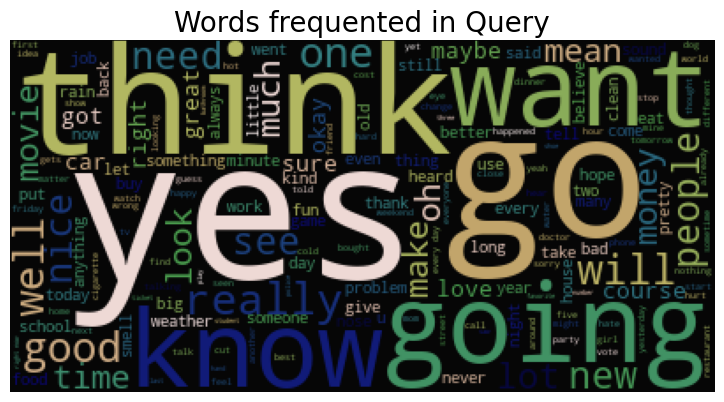

In [24]:
wordcloud(df, 'Query')

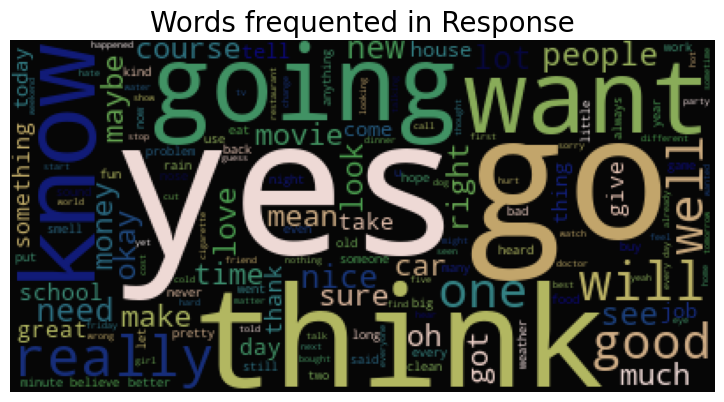

In [25]:
wordcloud(df, 'Response')

TEXT NORMALIZATION

In [26]:
import re

In [27]:
punc_lower = lambda x:re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

In [28]:
remove_n = lambda x:re.sub("\n", " ", x)

In [29]:
remove_non_ascii = lambda x:re.sub(r'[^\x00-\x7f]', r' ', x)

In [30]:
alphanumeric = lambda x:re.sub('\w*\d\w*', ' ', x)

In [31]:
df['Query'] = df['Query'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

In [32]:
df

,Query,Response,neg,neu,pos,compound
0,hi how are you doing,i'm fine. how about yourself?,0.000,1.000,0.000,0.0000
1,i m fine how about yourself,i'm pretty good. thanks for asking.,0.000,0.690,0.310,0.2023
2,i m pretty good thanks for asking,no problem. so how have you been?,0.000,0.250,0.750,0.8402
3,no problem so how have you been,i've been great. what about you?,0.495,0.505,0.000,-0.5994
4,i ve been great what about you,i've been good. i'm in school right now.,0.000,0.549,0.451,0.6249
...,...,...,...,...,...,...
3720,that s a good question maybe it s not old age,are you right-handed?,0.000,0.707,0.293,0.4404
3721,are you right handed,yes. all my life.,0.000,1.000,0.000,0.0000
3722,yes all my life,you're wearing out your right hand. stop using...,0.000,0.526,0.474,0.4019
3723,you re wearing out your right hand stop using...,but i do all my writing with my right hand.,0.153,0.625,0.222,0.2500


In [33]:
imp_sent = df.sort_values(by='compound', ascending=False)

In [34]:
imp_sent.head(5)

,Query,Response,neg,neu,pos,compound
1019,if we are good we will be happy in heaven wit...,that's what many people believe.,0.0,0.400,0.600,0.9001
565,yeah it sounds like it s going to be the best...,"exactly, it seems like it's going to be loads ...",0.0,0.463,0.537,0.8910
1235,that is a lot of friends do you have a best f...,of course. i have lots of best friends.,0.0,0.400,0.600,0.8885
3414,well that s okay as long as it helps him rel...,"yes, we need a relaxed president who thinks cl...",0.0,0.419,0.581,0.8883
3470,so it s better to save money than to have an h...,"well, the democratic party says it was an hone...",0.0,0.482,0.518,0.8651


In [35]:
pos_sent = df.sort_values(by='pos', ascending=False)

In [36]:
pos_sent.head(5)

,Query,Response,neg,neu,pos,compound
1659,please,you know the rules.,0.0,0.0,1.0,0.3182
1191,yes,no. that's incomplete.,0.0,0.0,1.0,0.4019
223,well congratulations,thank you.,0.0,0.0,1.0,0.7184
2745,i agree,you never know what might happen on these free...,0.0,0.0,1.0,0.3612
3583,sure,thank you.,0.0,0.0,1.0,0.3182


In [37]:
neg_sent = df.sort_values(by='neg', ascending=False)

In [38]:
neg_sent.head(5)

,Query,Response,neg,neu,pos,compound
1294,no,how do you know?,1.000,0.000,0.0,-0.2960
2378,no,he had dirty fingernails.,1.000,0.000,0.0,-0.2960
154,no problem,did you need something?,1.000,0.000,0.0,-0.5994
3095,no i hate vegetables,but you eat fruits.,0.855,0.145,0.0,-0.7096
13,never better thanks,so how have you been lately?,0.828,0.172,0.0,-0.5875


In [39]:
neu_sent = df.sort_values(by='neu', ascending=False)

In [41]:
neu_sent.head(5)

,Query,Response,neg,neu,pos,compound
0,hi how are you doing,i'm fine. how about yourself?,0.0,1.0,0.0,0.0
3050,we get hamburgers and steak,"oh, that's so delicious.",0.0,1.0,0.0,0.0
1596,what is gravity,it's the force that pulls everything down.,0.0,1.0,0.0,0.0
1597,it s the force that pulls everything down,i don't understand.,0.0,1.0,0.0,0.0
1598,i don t understand,"if you pour water into a glass, the water goes...",0.0,1.0,0.0,0.0


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
tfidf = TfidfVectorizer()

In [44]:
factors = tfidf.fit_transform(df['Query']).toarray()

In [45]:
tfidf.get_feature_names_out()

array(['able', 'about', 'absolutely', ..., 'yy', 'zip', 'zoo'],
      dtype=object)

APPLICATION

In [46]:
from sklearn.metrics.pairwise import cosine_distances

In [47]:
def lemmatize_with_nltk(text):
    from nltk.stem import WordNetLemmatizer
    from nltk.tokenize import word_tokenize
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(lemmatized_tokens)

In [54]:
query = "who are you ?"
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def chatbot(query):
    #step1: clean
    query = lemmatizer.lemmatize(query)
    #step2: word embedding transform
    query_vector = tfidf.transform([query]).toarray()
    #step3: cosine similarity
    similar_score = 1 - cosine_distances(factors, query_vector)
    index = similar_score.argmax()
    matching_question = df.loc[index]['Query']
    response = df.loc[index]['Response']
    pos_score = df.loc[index]['pos']
    neu_score = df.loc[index]['neu']
    neg_score = df.loc[index]['neg']
    confidence = similar_score[index][0]
    chat_dict = {'match': matching_question,
                'response': response,
                'score': confidence,
                'pos': pos_score,
                'neu': neu_score,
                'neg': neg_score}
    return chat_dict

In [ ]:
while True:
    query = input('USER: ')
    if query == 'exit':
        break
        
    response = chatbot(query)
    if response['score'] <= 0.2:
        print('BOT: Please rephrase your Question.')
        
    else:
        print('='*80)
        print('logs:\n Matched Question: %r\n Confidence Score: %0.2f \n Positive Score: %r \n Neutral Score: %r \n Negative Score: %r '%(response['match'], response['score']*100, response['pos'], response['neu'], response['neg']))
        print('='*80)
        print('BOT: ', response['response'])

USER: hi
logs:
 Matched Question: 'hi  how are you doing '
 Confidence Score: 68.06 
 Positive Score: 0.0 
 Neutral Score: 1.0 
 Negative Score: 0.0 
BOT:  i'm fine. how about yourself?
USER: good
logs:
 Matched Question: 'that s no good '
 Confidence Score: 65.61 
 Positive Score: 0.499 
 Neutral Score: 0.156 
 Negative Score: 0.344 
BOT:  we have to find a cheaper house.
USER: what
logs:
 Matched Question: 'what s that '
 Confidence Score: 73.40 
 Positive Score: 0.0 
 Neutral Score: 1.0 
 Negative Score: 0.0 
BOT:  people talk about current events.
USER: yes
logs:
 Matched Question: 'yes '
 Confidence Score: 100.00 
 Positive Score: 1.0 
 Neutral Score: 0.0 
 Negative Score: 0.0 
BOT:  are you reading this paper?
